## Exploratory Data Analysis
-------------------------------------------------------------------------------------------

In this notebook, we'll be examining basic EDA tools to aid us in predicting solar irradiance

#### Import Packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

#### Read in dataset

In [3]:
# Read in dataset
cleaned_df= pd.read_csv('../datasets/cleaned/cleaned_solar_irradiation.csv')

#### Show top 5 samples

In [4]:
# Show top 5 samples
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2007-01-01,1,2007-01-01,11.63,31.83,97.0,1001.90,210.4,4.54,0.0,38.2,38.2
1,2007-01-02,1,2007-01-02,6.00,5.54,57.4,1011.42,310.8,6.36,662.3,40.9,260.2
2,2007-01-03,1,2007-01-03,6.51,6.79,67.2,1017.44,225.7,5.16,589.0,47.3,251.7
3,2007-01-04,1,2007-01-04,9.18,10.27,81.0,1011.68,232.8,5.01,354.3,88.9,211.8
4,2007-01-05,1,2007-01-05,13.88,34.87,91.3,1004.53,218.8,5.80,0.0,42.7,42.7


#### Summary statistics

In [5]:
# Descriptive statistics summary
cleaned_df.describe()

,MonthPE,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
count,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000
mean,6.519722,13.725090,20.197389,62.377802,1008.485452,213.559355,4.017620,284.680166,135.056386,291.991124
std,3.447635,9.635711,12.467818,15.050839,8.178518,83.980082,1.792471,232.260278,59.707940,139.048734
min,1.000000,-13.560000,1.208333,20.500000,965.823077,4.000000,0.660000,0.000000,7.200000,7.200000
25%,4.000000,5.683333,9.424621,51.241071,1003.305938,152.785714,2.663352,44.961538,87.000000,182.266667
50%,7.000000,14.191883,17.957143,60.812500,1008.353125,226.654762,3.731010,266.928571,127.961538,289.048077
75%,10.000000,22.395313,29.364732,72.587500,1013.657857,284.648810,5.025000,493.224760,178.312500,412.377404
max,12.000000,33.806250,58.100000,97.900000,1038.100000,355.727273,13.790909,805.750000,333.266667,570.466667


#### Examine missing values for each feature

In [6]:
# Check the missing values
cleaned_df.isnull().sum()

Unnamed: 0         0
MonthPE            0
Date               0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_DHI          0
Daily_radiation    0
dtype: int64

#### Summary of dataframe

In [7]:
# Summary of dataframe
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476 entries, 0 to 5475
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5476 non-null   object 
 1   MonthPE          5476 non-null   int64  
 2   Date             5476 non-null   object 
 3   Daily_Temp       5476 non-null   float64
 4   Daily_Precip     5476 non-null   float64
 5   Daily_Humidity   5476 non-null   float64
 6   Daily_Pressure   5476 non-null   float64
 7   Daily_WindDir    5476 non-null   float64
 8   Daily_WindSpeed  5476 non-null   float64
 9   Daily_DNI        5476 non-null   float64
 10  Daily_DHI        5476 non-null   float64
 11  Daily_radiation  5476 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 513.5+ KB


#### Scatterplot of monthly irradiation

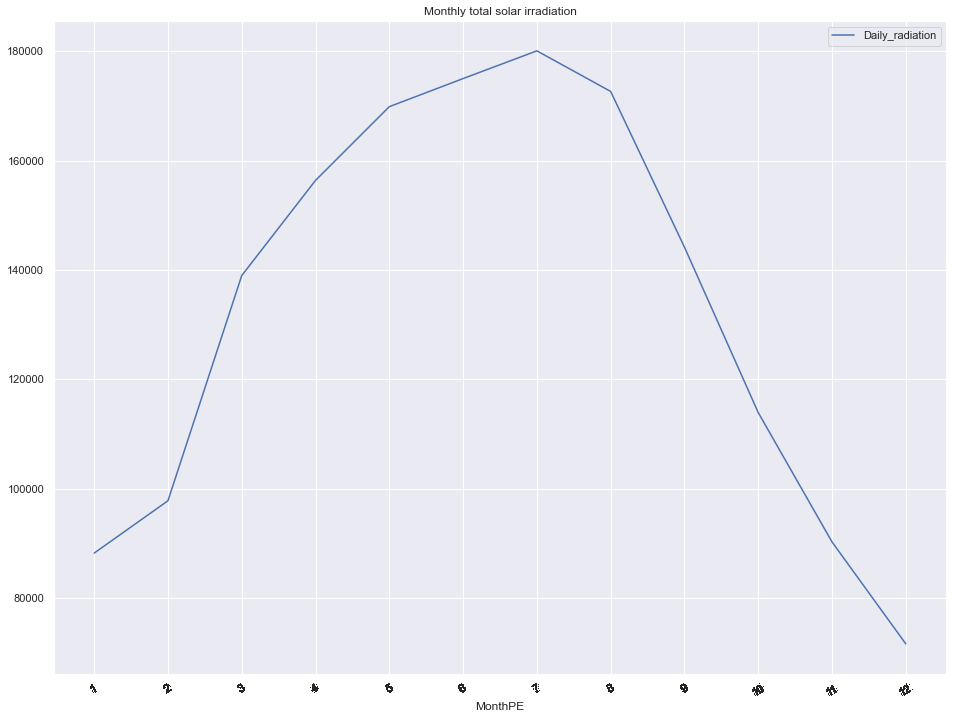

In [8]:
# A plot pf total irriadtion for each month
rad_vs_month= cleaned_df.loc[:, ['Daily_radiation', 'MonthPE']].groupby('MonthPE').sum()

## Plot object
rad_vs_month.plot()

## Figure parameters
plt.xticks(cleaned_df['MonthPE'], rotation=30)
plt.title('Monthly total solar irradiation')
plt.show()

#### Scatterplot of daily irradiation

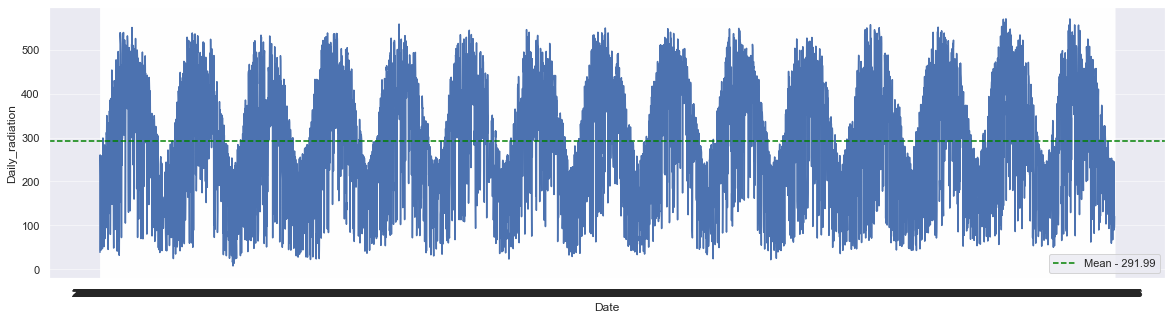

In [9]:
# Daily solar irradiation plot
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data= cleaned_df, x="Date", y="Daily_radiation")

rad_avg= cleaned_df['Daily_radiation'].mean()
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)

ax.legend()
plt.show()

#### Histogram distributions of features

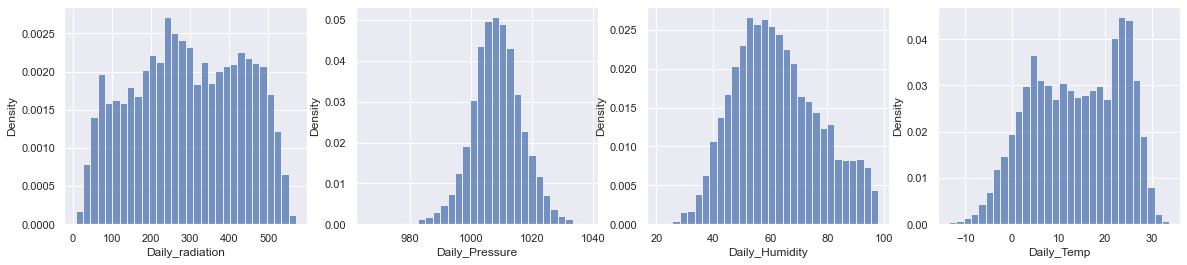

In [10]:
# Histogram distribution of weather features and solar irradiation
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(cleaned_df['Daily_radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(cleaned_df['Daily_Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(cleaned_df['Daily_Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(cleaned_df['Daily_Temp'], stat="density", bins=30, ax=ax[3])
plt.show()

#### Histogram plot of the daily mean radiation per month

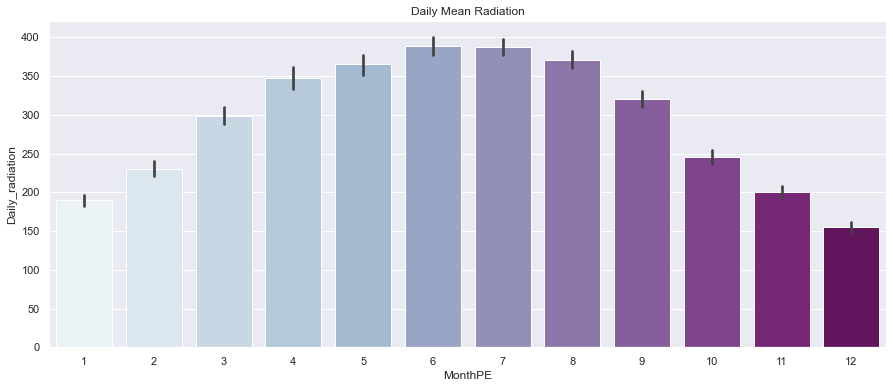

In [11]:
# Histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="MonthPE", y='Daily_radiation', data= cleaned_df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

#### Correlation matrix

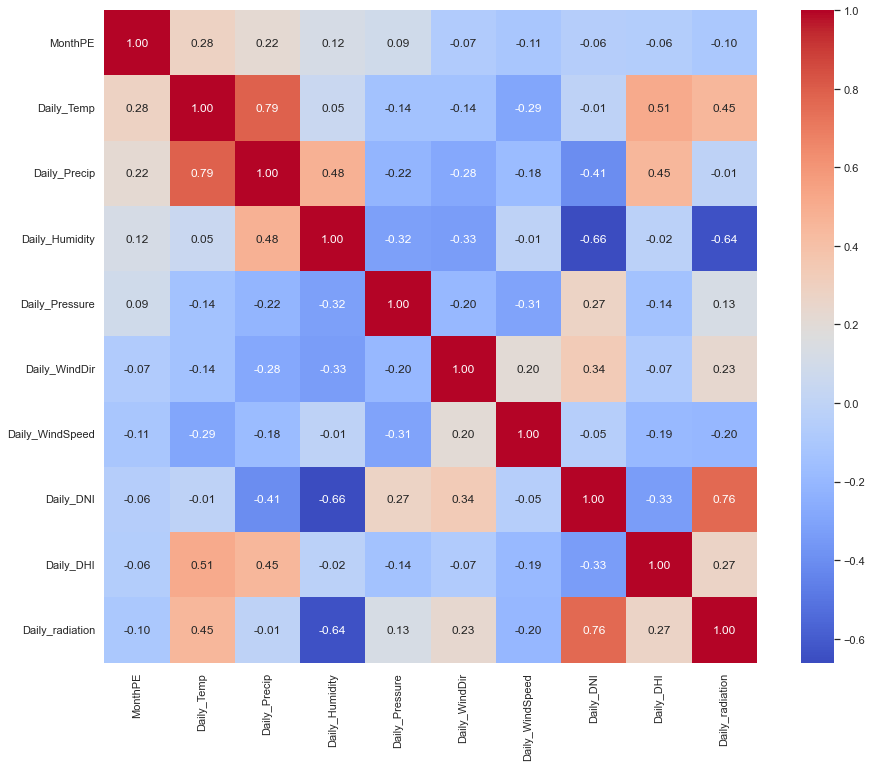

In [12]:
# feature correlation
corr= cleaned_df.corr(method = "pearson")

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

### Statistical check: stationary or non-stationary

In [13]:
# Adfuller testt on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = cleaned_df['Daily_radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # p-value <= 0.05

ADF Statistic: -5.129224
p-value: 0.000012
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
